In [1]:
import sys
import os
code_path = os.path.abspath('../src')
if code_path not in sys.path:
    sys.path.insert(0,code_path)
module_path = os.path.abspath('../src/clai/tellina-baseline/src')
if module_path not in sys.path:
    sys.path.insert(0,module_path)

In [2]:
import argparse

from main_utils import str2bool, get_device
from reader.datamodule import DataModule
from model.transformer import Transformer

parser = argparse.ArgumentParser()
parser.add_argument('--seed',type = int,default=1)
parser.add_argument('--mode',type=str , default='train')
parser.add_argument('--device',default='auto')
parser.add_argument('--checkpoint_path',type=str,default='')
parser.add_argument('--verbose',type=str2bool,default = False)
parser.add_argument('--log_graph',type=str2bool,default=False)
parser.add_argument('--log_embeddings',type=str2bool,default=False)
parser.add_argument('--guidance_distribution',type=str2bool,default=False)
parser.add_argument('--n_training_examples', type = int, default=-1)
parser.add_argument('--gradient_clip_val',type=float,default=2.754)
parser.add_argument('--gain',type=float,default=0.6)
parser.add_argument('--multigpu',type=str2bool,default=False)
parser = DataModule.add_model_specific_args(parser)
parser = Transformer.add_model_specific_args(parser)

args,unparsed = parser.parse_known_args()
args.device = get_device(args)

Setting bashlex grammar using file: /home/shikharb/HSE-Translation/src/clai/tellina-baseline/src/bashlint/grammar/grammar100.txt
Bashlint grammar set up (148 utilities)



In [4]:
import pickle
import os
c=0
attr_records = []
for filename in os.listdir('../run/attribution/test_attr/'):
    if filename.startswith('test5k_attr'):
        with open('../run/attribution/test_attr/' + filename,'rb') as f:
            rec = pickle.load(f)
            attr_records.append(rec)
len(attr_records)

188

In [4]:
# import pickle
# file_path = '../run/attribution/attr_5ksteps.pkl'

# with open(file_path,'rb') as f:
#     attr_records = pickle.load(f)
# #list of list of (attr,err,translation) objects , outer list = # of batches, inner list = # of max time step-1 in the corresponding batch

# len(attr_records)

309

In [52]:
import seaborn as sns
import numpy as np
import torch
import matplotlib.pyplot as plt

def plot_attribution(attribution_matrix, error, invocation, cmd, save_fig_name=None):
    X = cmd
    Y = []
    for phrase in invocation:
        if len(phrase)>0:
            Y.append(' '.join(phrase))
        else:
            print('EMPTY PHRASESE:::',invocation)
            assert False
    x_l = len(X)
    y_l = len(Y)
    print(X)
    
    attribution_matrix = attribution_matrix.T
    attribution_matrix = attribution_matrix[:y_l,:x_l]
    ax = sns.heatmap(attribution_matrix, xticklabels = X, yticklabels = Y,cmap="YlGnBu",annot=True)#,vmin = 0.0, vmax = 1.0,cmap="binary_r")##,cmap="YlGnBu")
    if save_fig_name is not None:
        plt.savefig(save_fig_name)
    plt.show()
    return ax

def create_attribution_matrix(attr_lst_per_ts):
    #returns time step X max_segment_cnt from time step sized list of max_segment_cnt, max_segment_len matrices
    attrib = []
    for attr in attr_lst_per_ts:
        attr = attr.mean(-1)
        attr = attr/torch.norm(attr)
        attrib.append(attr.detach().cpu().numpy())
    return np.array(attrib)
    

In [53]:
import matplotlib.pyplot as plt

#nested :: batch over full data ---> timestep over batch max timestep-1 --> each element is tuple(attr,err,translation) == attr
# attr shape is [batch_size, max_phrase_count, max_phrase_len]
attr_full_data = []
err_full_data = []
invocation_phrases_full_data = []
cmd_full_data = []
pred_full_data = []

for attr_record_batch,trans in attr_records:
    attr_ex_ts = None
    err_ex_ts = None
    for attr_record_ts in attr_record_batch:
        attr, err = attr_record_ts
        batch_size =  attr.shape[0]
        if attr_ex_ts is None:
            attr_ex_ts = [[] for b in range(batch_size)] #list of list of attributions per example per time step
            err_ex_ts = [[] for b in range(batch_size)]
        for b in range(batch_size):
            attr_i = attr[b] #attr for bth example in batch at time step ts
            attr_ex_ts[b].append(attr_i)
            err_ex_ts[b].append(err[b].detach().cpu().item())
    attr = [create_attribution_matrix(A) for A in attr_ex_ts]  
    attr_full_data.extend(attr)
    err_full_data.extend(np.array(err_ex_ts))
    #####
    invocation_phrases_full_data.extend([T.inv_phrasing for T in trans])
    cmd_full_data.extend([T.truth[0] for T in trans])
    pred_full_data.extend([T.pred[0] for T in trans])
#     print('=='*30)

In [54]:
def plot_fig(idx,attr_full_data = attr_full_data,err_full_data = err_full_data,invocation_phrases_full_data=invocation_phrases_full_data,cmd_full_data=cmd_full_data, save_fig_name = None):
    x_size = len(cmd_full_data[idx])
    y_size = len(invocation_phrases_full_data[idx])
    plt.figure(1,figsize=(x_size,y_size))
    ax = plot_attribution(attr_full_data[idx], err_full_data[idx], invocation_phrases_full_data[idx],cmd_full_data[idx], save_fig_name=save_fig_name)
    return ax

0
['find', 'Path', '-name', 'Regex']


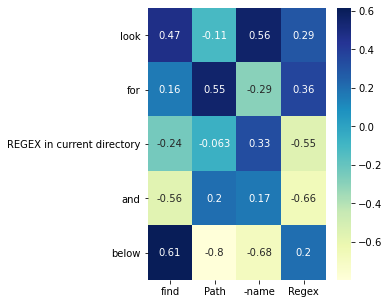

------------------------------------------------------------------------------------------------------------------------
1
['find', 'Path', '-name', 'Regex']


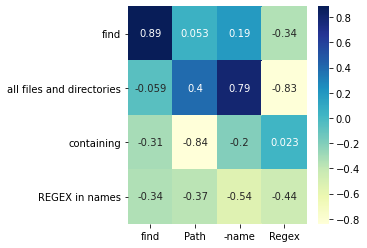

------------------------------------------------------------------------------------------------------------------------
2
['ln', '-s', 'File', 'Regex']


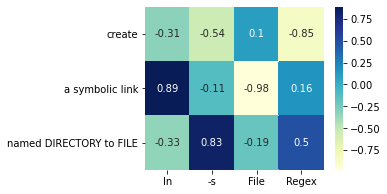

------------------------------------------------------------------------------------------------------------------------
3
['find', 'Path', '-type', 'Type', '-exec', 'chmod', 'Permission', 'File', '\\;']


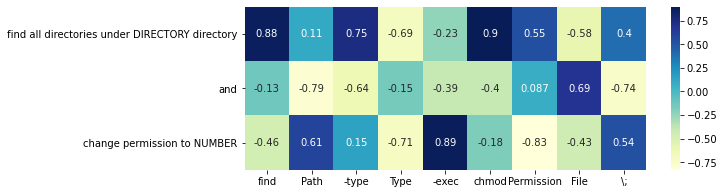

------------------------------------------------------------------------------------------------------------------------
4
['echo', '-n', 'Regex', '|', 'md5sum']


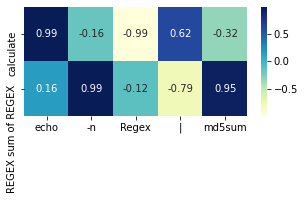

------------------------------------------------------------------------------------------------------------------------
5
['find', 'Path', '-name', 'Regex']


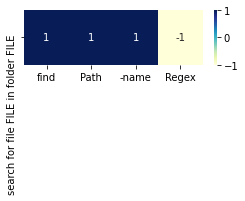

------------------------------------------------------------------------------------------------------------------------
6
['find', 'Path', '-group', 'Regex']


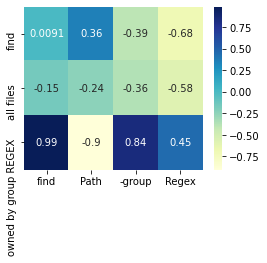

------------------------------------------------------------------------------------------------------------------------
7
['sort', '|', 'uniq', '-c']


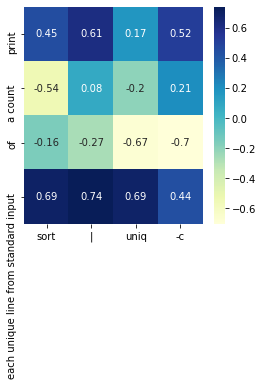

------------------------------------------------------------------------------------------------------------------------
8
['find', 'Path', '-path', 'Regex', '-prune', '-or', '-print']


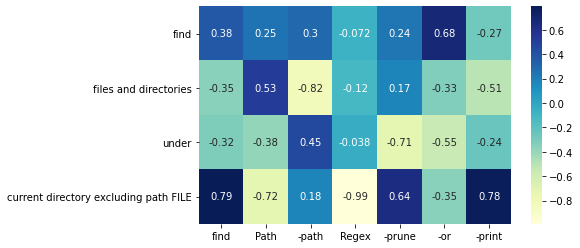

------------------------------------------------------------------------------------------------------------------------
9
['readlink', '-f', 'File']


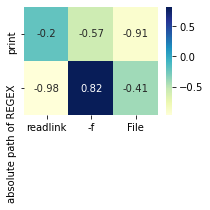

------------------------------------------------------------------------------------------------------------------------
10
['find', 'Path', '-type', 'Type', '!', '-perm', 'Permission']


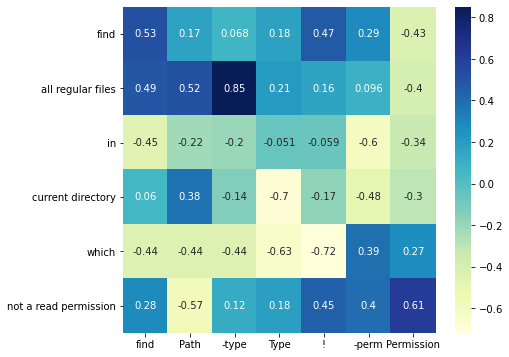

------------------------------------------------------------------------------------------------------------------------
11
['find', 'Path', '-name', 'Regex', '-type', 'Type']


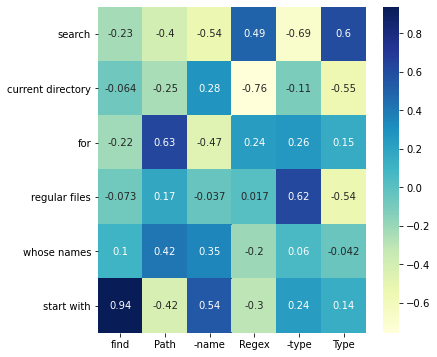

------------------------------------------------------------------------------------------------------------------------
12
['find', 'Path', '-type', 'Type', '-name', 'Regex']


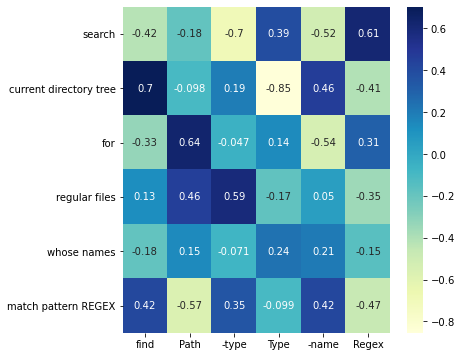

------------------------------------------------------------------------------------------------------------------------
13
['readlink', '-f', 'File']


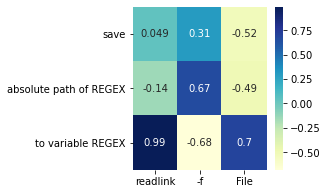

------------------------------------------------------------------------------------------------------------------------
14
['find', 'Path', '-name', 'Regex', '|', 'grep', '-f', '<(sed', 'Program', 'File)']


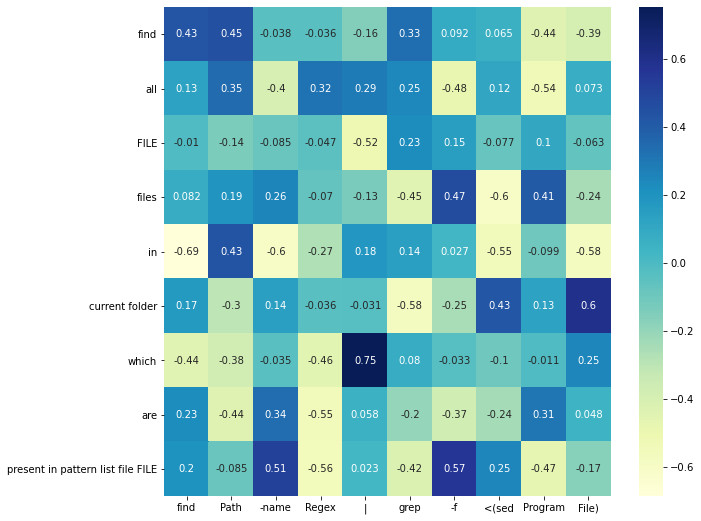

------------------------------------------------------------------------------------------------------------------------
15
['find', 'Path', '-type', 'Type']


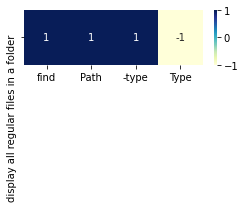

------------------------------------------------------------------------------------------------------------------------
16
['find', 'Path', '-name', 'Regex', '-ls']


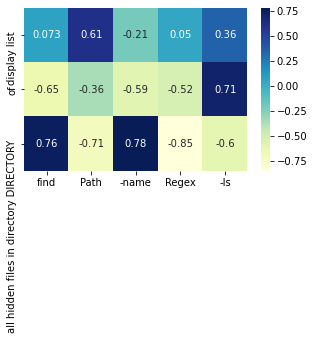

------------------------------------------------------------------------------------------------------------------------
17
['find', 'Path', '-mtime', 'Timespan']


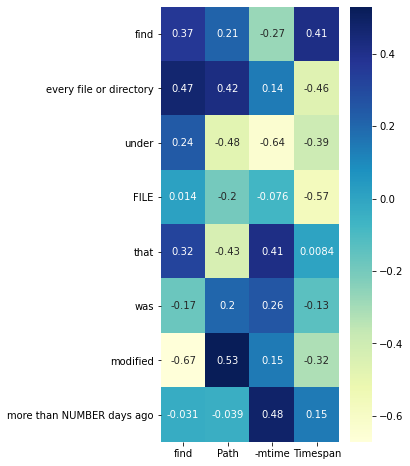

------------------------------------------------------------------------------------------------------------------------
18
['find', 'Path', '-type', 'Type']


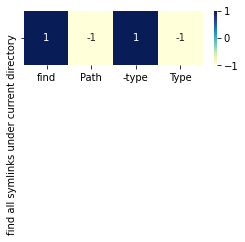

------------------------------------------------------------------------------------------------------------------------
19
['readlink', '-f', 'File']


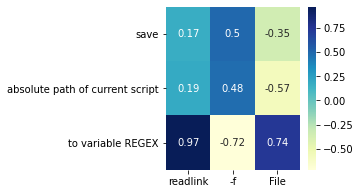

------------------------------------------------------------------------------------------------------------------------
20
['ifconfig', 'Regex', '|', 'grep', 'Regex']


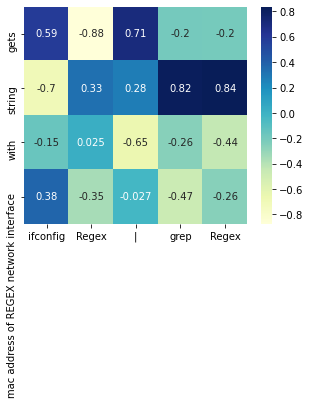

------------------------------------------------------------------------------------------------------------------------
21
['split', '-l', 'Quantity', 'File', 'Regex']


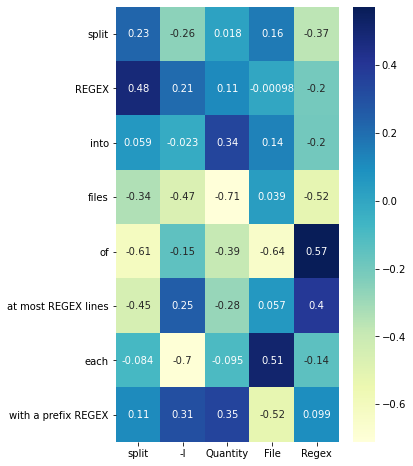

------------------------------------------------------------------------------------------------------------------------
22
['find', 'Path', '\\(', '-name', 'Regex', '-prune', '\\)', '-and', '\\(', '-name', 'Regex', '-prune', '\\)', '-or', '\\(', '-name', 'Regex', '-print', '\\)']


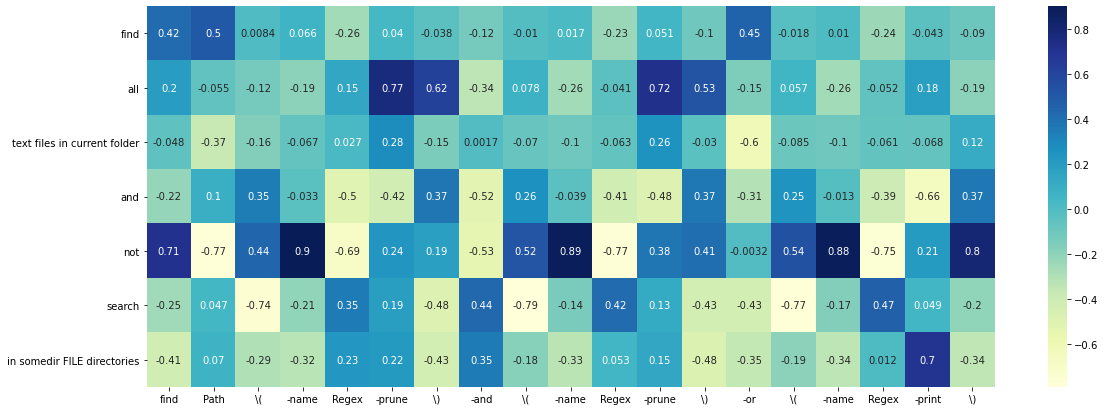

------------------------------------------------------------------------------------------------------------------------
23
['find', 'Path', '-name', 'Regex', '!', '-name', 'Regex', '-prune']


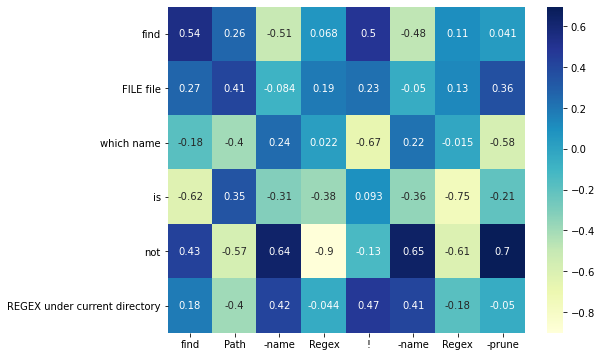

------------------------------------------------------------------------------------------------------------------------
24
['sort', '-u', 'File', 'File']


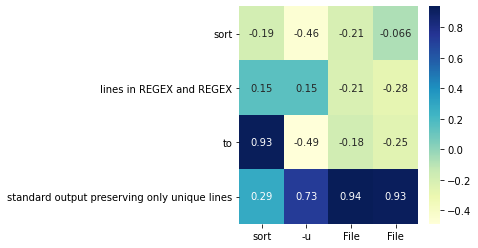

------------------------------------------------------------------------------------------------------------------------
25
['find', 'Path', '!', '-name', 'Regex', '-prune']


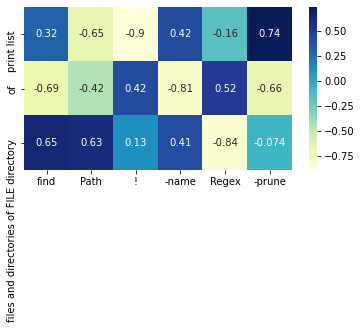

------------------------------------------------------------------------------------------------------------------------
26
['echo', 'Regex', '|', 'rev', '|', 'cut', '-d', 'Regex', '-f', 'Number', '|', 'rev']


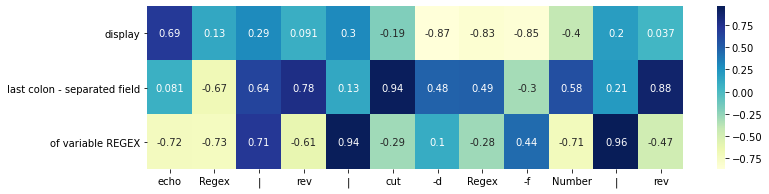

------------------------------------------------------------------------------------------------------------------------
27
['find', 'Path', '-perm', 'Permission']


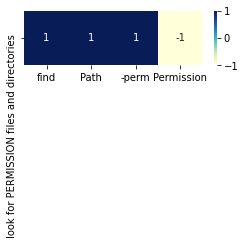

------------------------------------------------------------------------------------------------------------------------
28
['ping', '-c', 'Quantity', 'Regex']


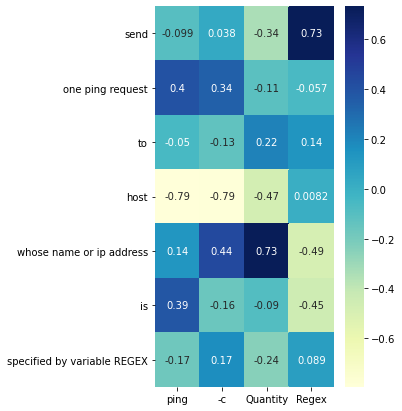

------------------------------------------------------------------------------------------------------------------------
29
['find', 'Path', '-name', 'Regex']


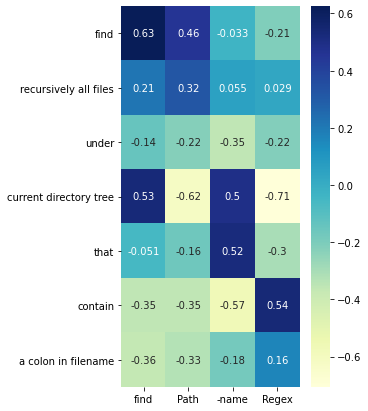

------------------------------------------------------------------------------------------------------------------------
30
['find', 'Path', '-type', 'Type', '-inum', 'Quantity', '-exec', 'mv', 'File', 'File', '\\;']


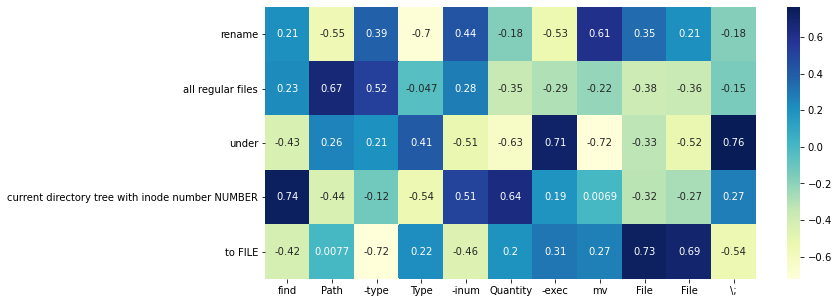

------------------------------------------------------------------------------------------------------------------------
31
['find', 'Path', '-cmin', 'Quantity']


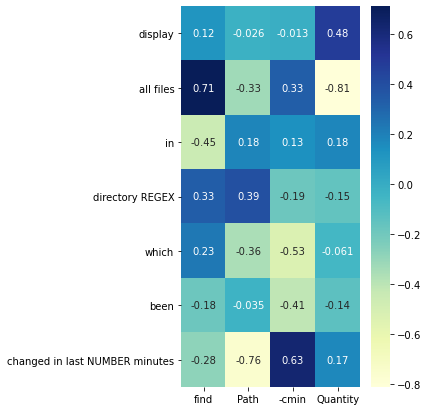

------------------------------------------------------------------------------------------------------------------------
32
['yes', '|', 'head', '-n', 'Quantity', '|', 'awk', 'Program']


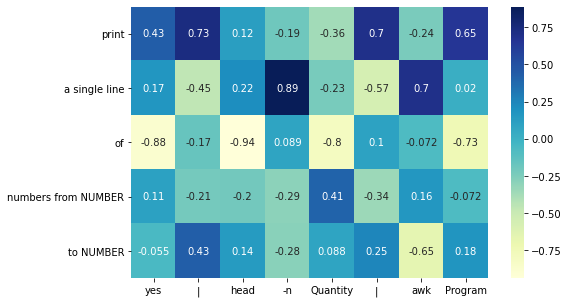

------------------------------------------------------------------------------------------------------------------------
33
['chgrp', '-R', 'Regex', 'File']


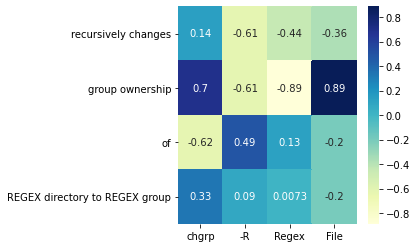

------------------------------------------------------------------------------------------------------------------------
34
['find', 'Path', '-user', 'Regex']


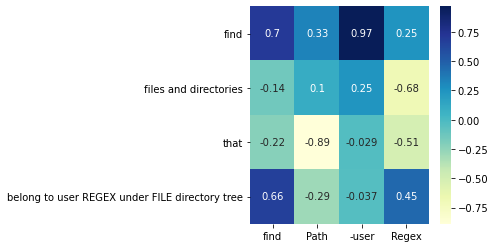

------------------------------------------------------------------------------------------------------------------------
35
['find', 'Path', '-type', 'Type', '-perm', 'Permission']


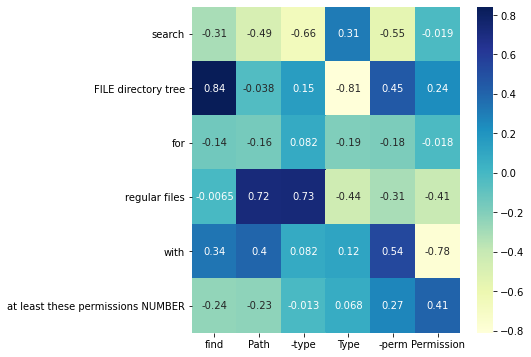

------------------------------------------------------------------------------------------------------------------------
36
['find', 'Path', '-type', 'Type', '-and', '!', '-name', 'Regex', '-or', '-name', 'Regex', '-and', '!', '-prune']


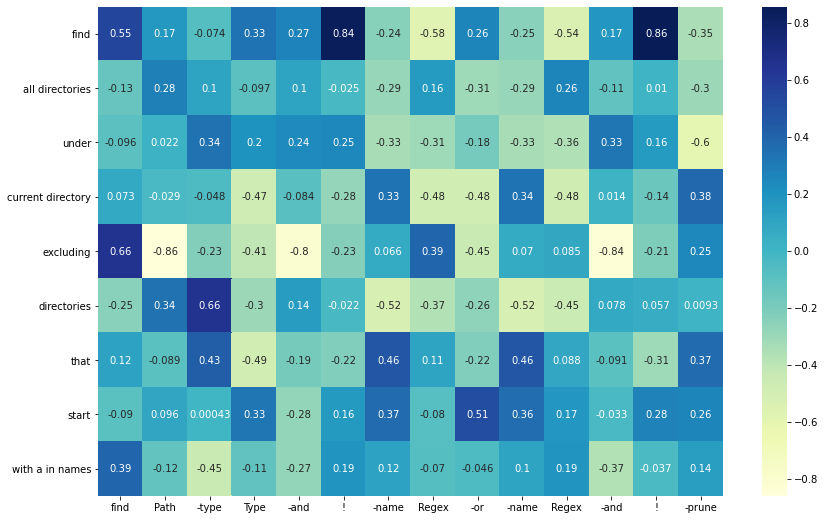

------------------------------------------------------------------------------------------------------------------------
37
['find', 'Path', '-size', 'Size']


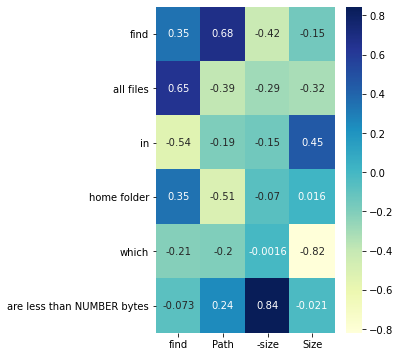

------------------------------------------------------------------------------------------------------------------------
38
['find', 'Path', '-type', 'Type', '-empty']


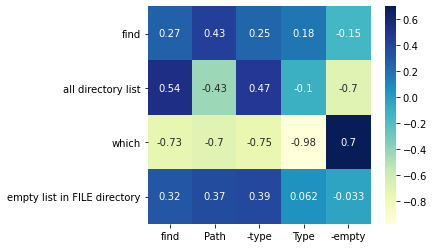

------------------------------------------------------------------------------------------------------------------------
39
['find', 'Path', 'Path', 'Path', '-name', 'Regex', '-type', 'Type']


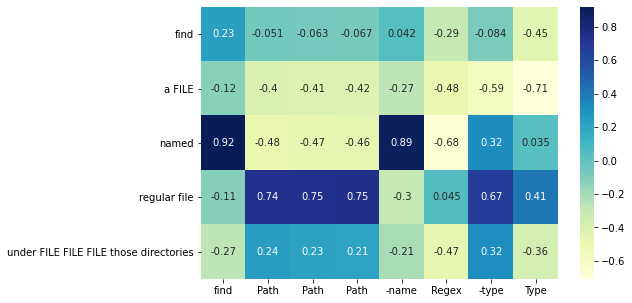

------------------------------------------------------------------------------------------------------------------------
40
['find', 'Path', '-type', 'Type', '-exec', 'chmod', 'Permission', 'File', '\\;']


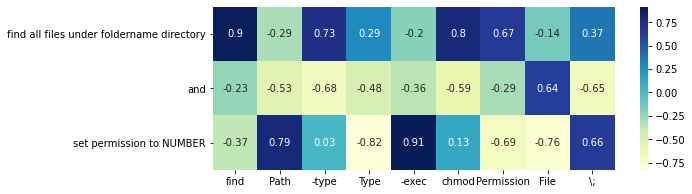

------------------------------------------------------------------------------------------------------------------------
41
['find', 'Path', '-wholename', 'Regex', '-prune', '-or', '-type', 'Type', '-perm', 'Permission', '-exec', 'ls', '-l', 'File', '\\;']


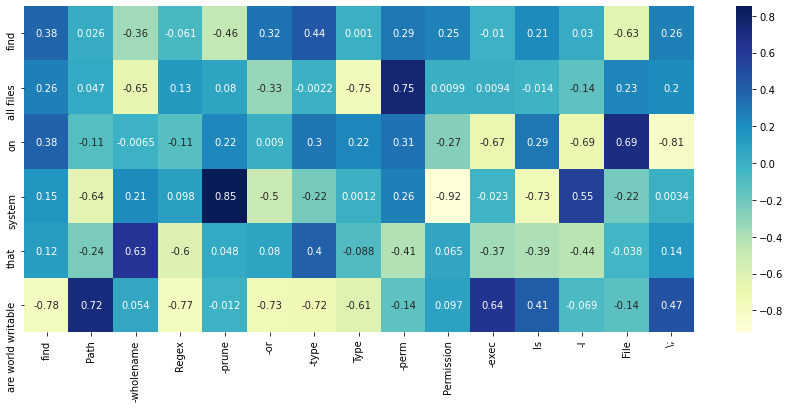

------------------------------------------------------------------------------------------------------------------------
42
['uname', '-a']


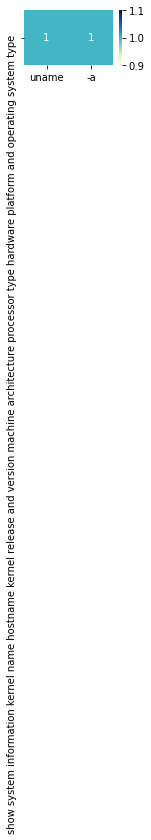

------------------------------------------------------------------------------------------------------------------------
43
['awk', 'Program', 'Program']


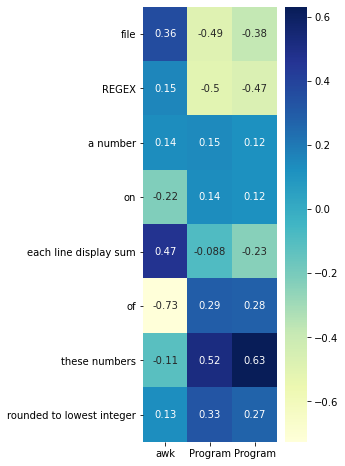

------------------------------------------------------------------------------------------------------------------------
44
['read', '-n', 'Quantity', 'Regex']


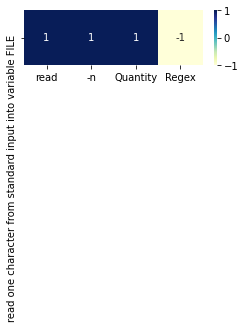

------------------------------------------------------------------------------------------------------------------------
45
['find', 'Path', '-mmin', 'Quantity']


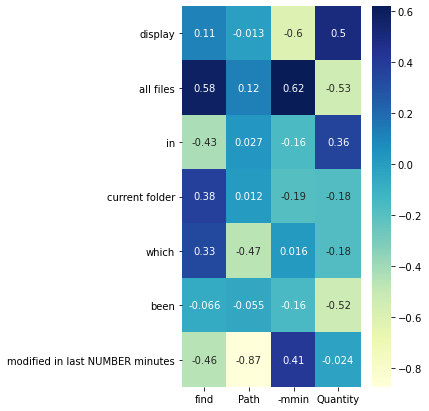

------------------------------------------------------------------------------------------------------------------------
46
['read', '-r', 'Regex']


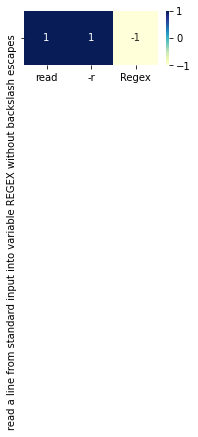

------------------------------------------------------------------------------------------------------------------------
47
['find', 'Path', '!', '\\(', '-name', 'Regex', '-prune', '\\)', '-type', 'Type', '-mtime', 'Timespan', '-print0']


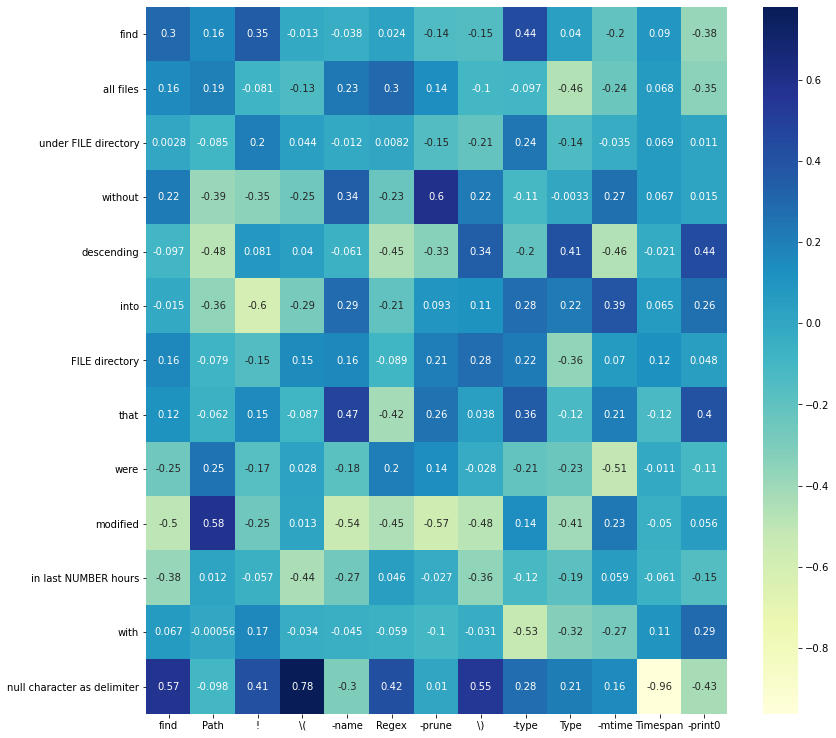

------------------------------------------------------------------------------------------------------------------------
48
['find', 'Path', '-type', 'Type', '-size', 'Size']


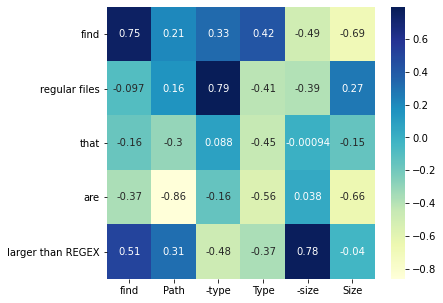

------------------------------------------------------------------------------------------------------------------------
49
['find', 'Path', '-type', 'Type', '-iwholename', 'Regex', '-exec', 'grep', '-H', 'Regex', 'File', '\\;']


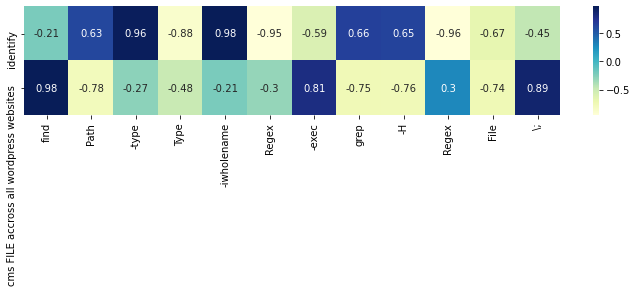

------------------------------------------------------------------------------------------------------------------------
50
['find', 'Path', '-inum', 'Quantity', '-exec', 'rm', 'File', '\\;']


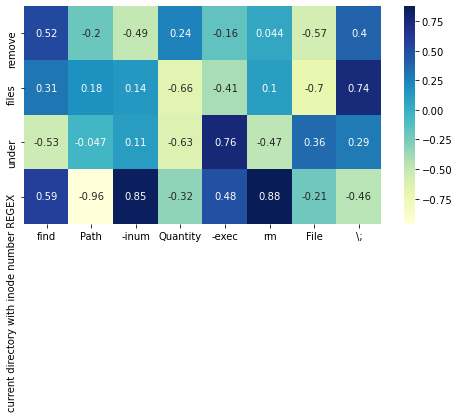

------------------------------------------------------------------------------------------------------------------------
51
['find', 'Path', '-name', 'Regex']


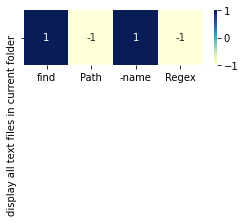

------------------------------------------------------------------------------------------------------------------------
52
['chmod', 'Permission', 'File', 'File', 'File']


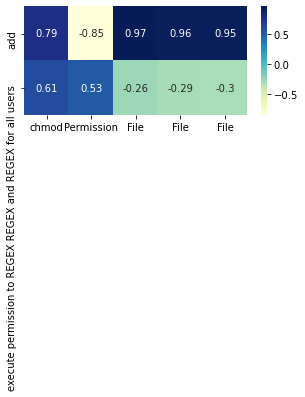

------------------------------------------------------------------------------------------------------------------------
53
['find', 'Path', '-name', 'Regex', '-type', 'Type']


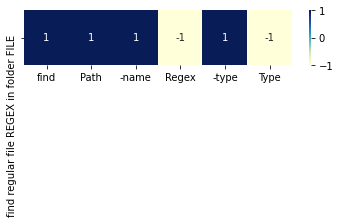

------------------------------------------------------------------------------------------------------------------------
54
['find', 'Path', 'Path', '-f', '-amin', 'Quantity']


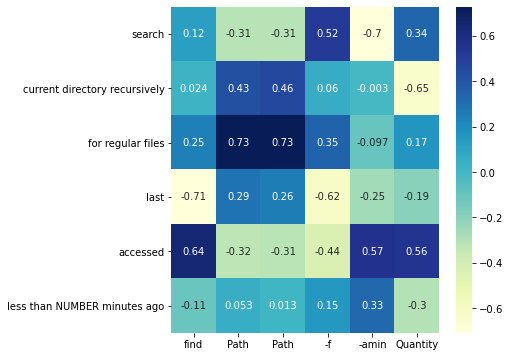

------------------------------------------------------------------------------------------------------------------------
55
['chmod', '-R', 'Permission', 'File']


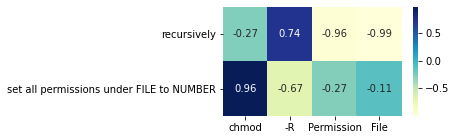

------------------------------------------------------------------------------------------------------------------------
56
['find', 'Path', '-type', 'Type']


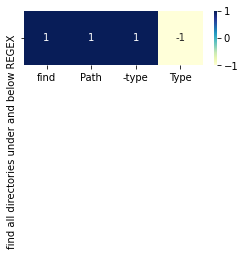

------------------------------------------------------------------------------------------------------------------------
57
['find', 'Path', '-perm', 'Permission', '-type', 'Type', '-exec', 'ls', '-l', 'File', '\\;']


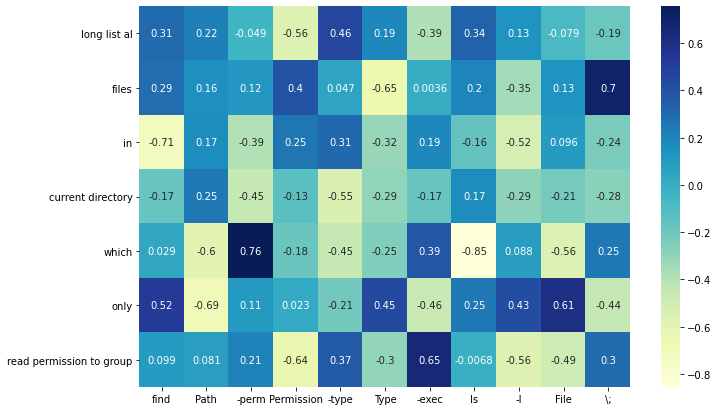

------------------------------------------------------------------------------------------------------------------------
58
['find', 'Path', '-newerct', 'Regex', '-print']


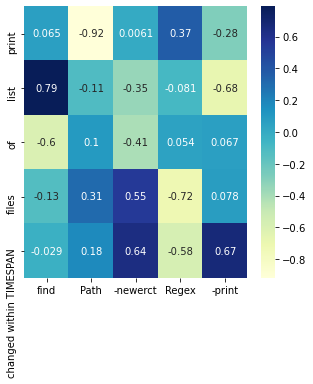

------------------------------------------------------------------------------------------------------------------------
59
['find', 'Path', '-type', 'Type', '-and', '-mmin', 'Quantity']


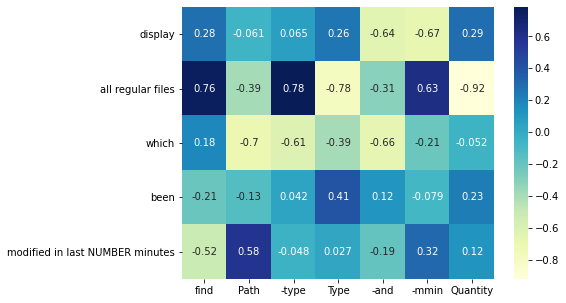

------------------------------------------------------------------------------------------------------------------------
60
['find', 'Path', '-iname', 'Regex']


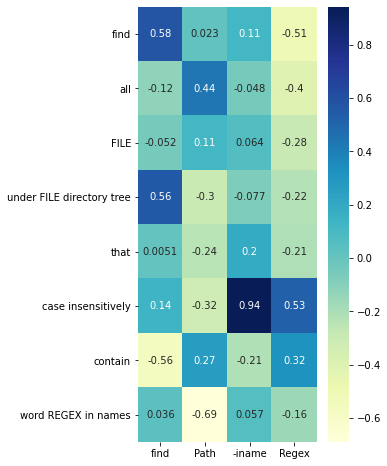

------------------------------------------------------------------------------------------------------------------------
61
['chmod', 'Permission', 'File']


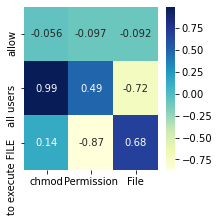

------------------------------------------------------------------------------------------------------------------------
62
['find', 'Path', '-type', 'Type']


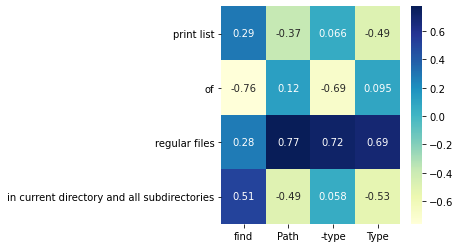

------------------------------------------------------------------------------------------------------------------------
63
['find', 'Path', '-type', 'Type', '-size', 'Size', '-exec', 'ls', '-l', '-h', 'File', '\\;', '|', 'awk', 'Program']


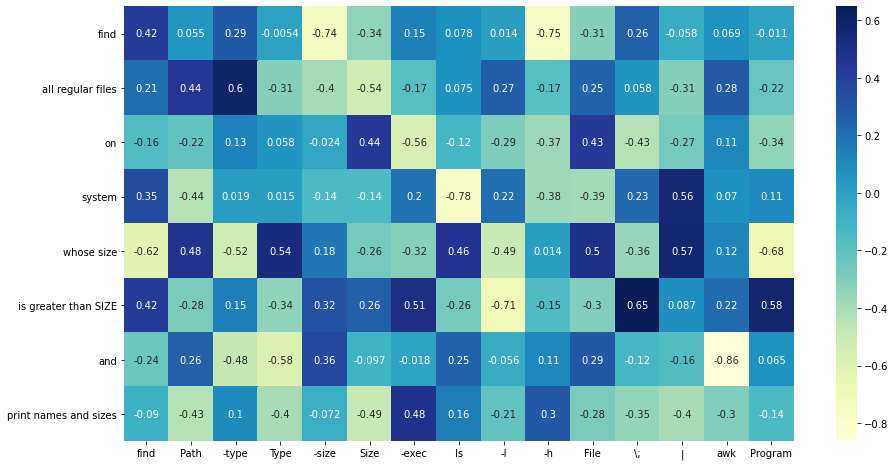

------------------------------------------------------------------------------------------------------------------------
64
['column', '-t', '-s', 'Regex', 'File']


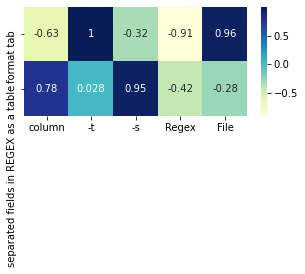

------------------------------------------------------------------------------------------------------------------------
65
['rev', 'File']


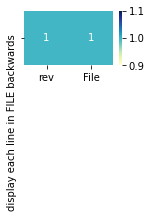

------------------------------------------------------------------------------------------------------------------------
66
['find', 'Path', '-type', 'Type', '-empty']


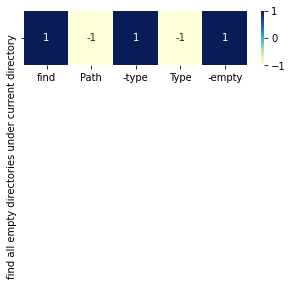

------------------------------------------------------------------------------------------------------------------------
67
['find', 'Path', '-name', 'Regex']


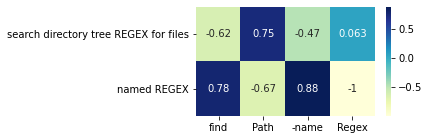

------------------------------------------------------------------------------------------------------------------------
68
['find', 'Path', '-name', 'Regex']


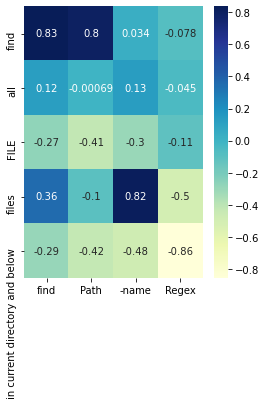

------------------------------------------------------------------------------------------------------------------------
69
['find', 'Path', '-size', 'Size']


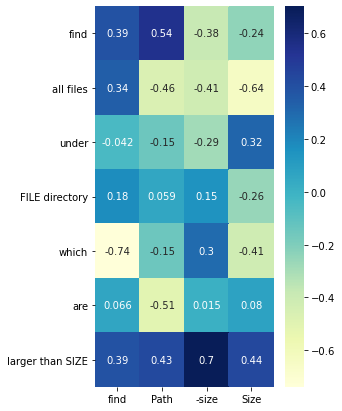

------------------------------------------------------------------------------------------------------------------------
70
['find', 'Path', '-atime', 'Timespan']


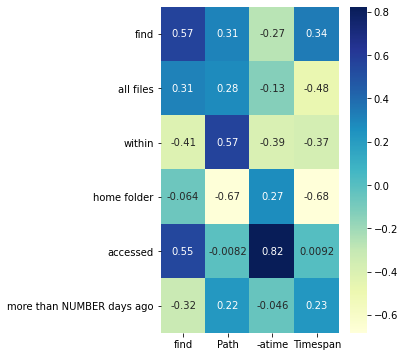

------------------------------------------------------------------------------------------------------------------------
71
['find', 'Path', '-name', 'Regex', '|', 'xargs', '-I', 'ReservedWord', 'rename', 'Regex', 'ReservedWord']


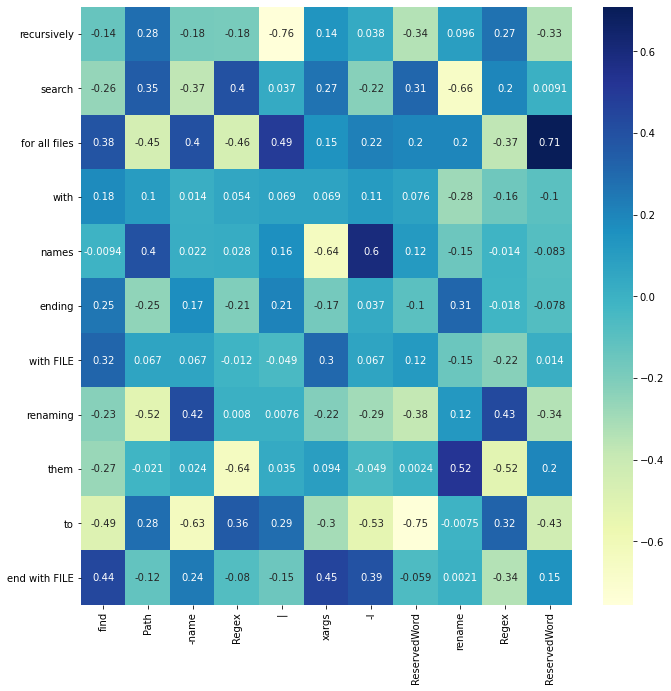

------------------------------------------------------------------------------------------------------------------------
72
['mount', '-o', 'Option', 'Regex']


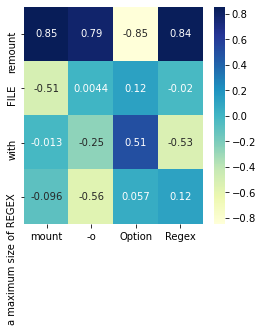

------------------------------------------------------------------------------------------------------------------------
73
['find', 'Path', '-name', 'Regex', '|', 'grep', 'Regex']


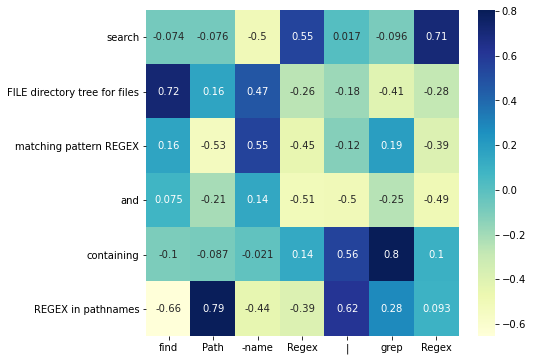

------------------------------------------------------------------------------------------------------------------------
74
['ln', '-f', '-s', 'File', 'Regex']


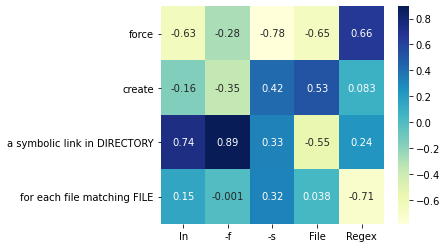

------------------------------------------------------------------------------------------------------------------------
75
['find', 'Path', '-iname', 'Regex']


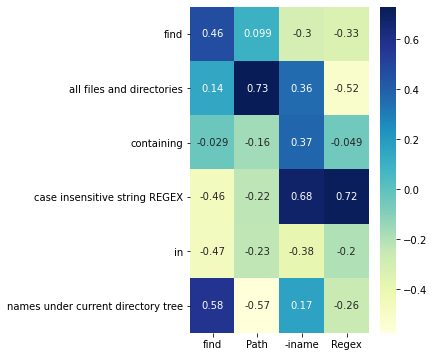

------------------------------------------------------------------------------------------------------------------------
76
['file', 'File', '|', 'grep', 'Regex']


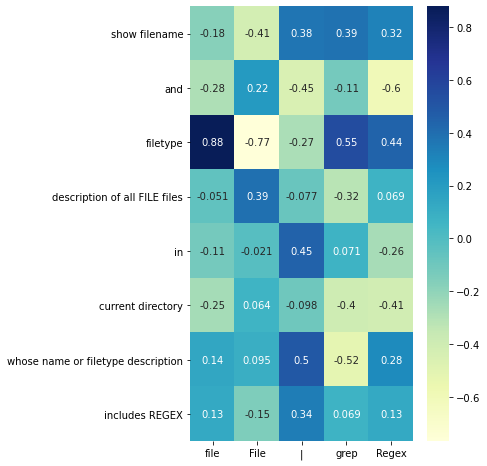

------------------------------------------------------------------------------------------------------------------------
77
['gzip', 'Regex']


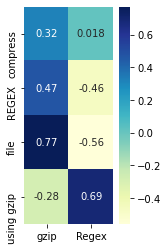

------------------------------------------------------------------------------------------------------------------------
78
['find', 'Path', '-type', 'Type', '-perm', 'Permission', '-print']


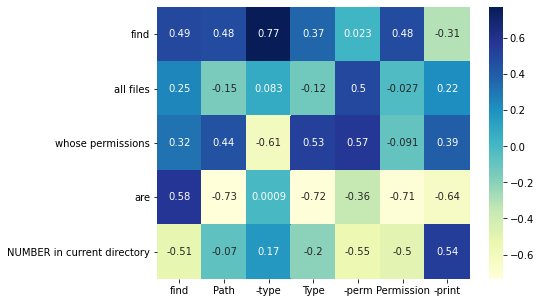

------------------------------------------------------------------------------------------------------------------------
79
['chmod', 'Permission', 'File', 'File']


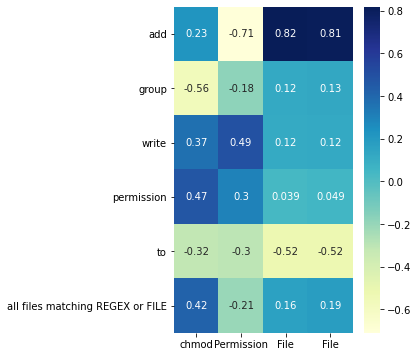

------------------------------------------------------------------------------------------------------------------------
80
['find', 'Path', '-iname', 'Regex']


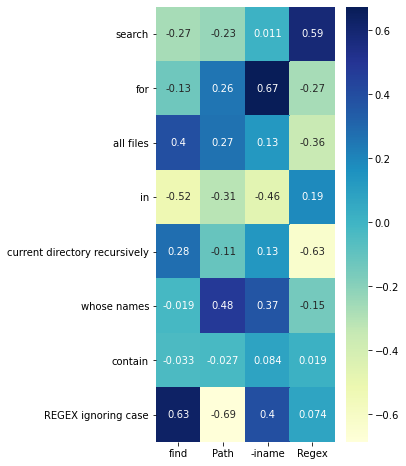

------------------------------------------------------------------------------------------------------------------------
81
['chown', 'Regex', '-R', 'File']


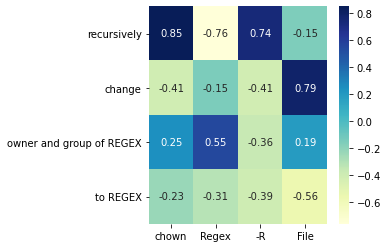

------------------------------------------------------------------------------------------------------------------------
82
['chgrp', 'Regex', 'File']


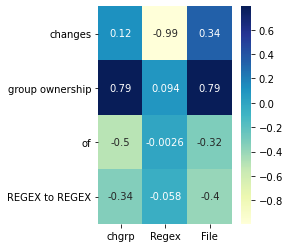

------------------------------------------------------------------------------------------------------------------------
83
['find', 'Path', '-atime', 'Timespan']


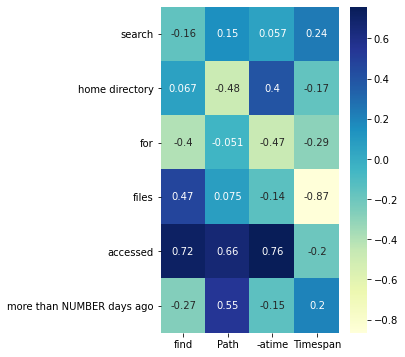

------------------------------------------------------------------------------------------------------------------------
84
['find', 'Path', '-name', 'Regex', '-exec', 'grep', '-l', 'Regex', 'File', '\\;']


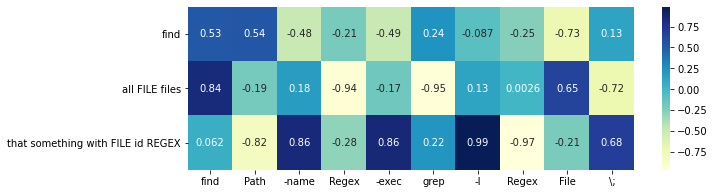

------------------------------------------------------------------------------------------------------------------------
85
['find', 'Path', '-size', 'Size']


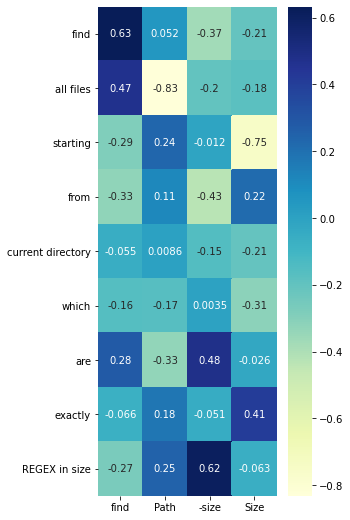

------------------------------------------------------------------------------------------------------------------------
86
['curl', 'Regex', '|', 'sh']


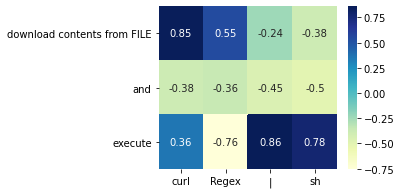

------------------------------------------------------------------------------------------------------------------------
87
['find', 'Path', '-name', 'Regex']


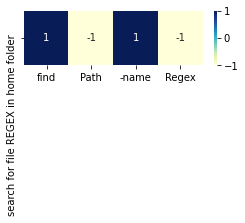

------------------------------------------------------------------------------------------------------------------------
88
['find', 'Path', '-size', 'Size']


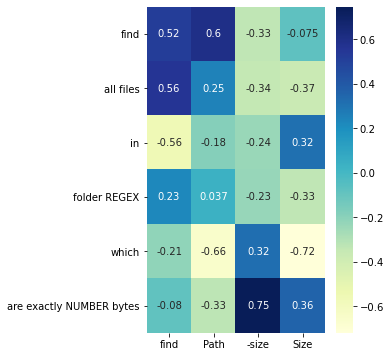

------------------------------------------------------------------------------------------------------------------------
89
['find', 'Path', '-type', 'Type', '-exec', 'grep', 'Regex', 'File', '\\;']


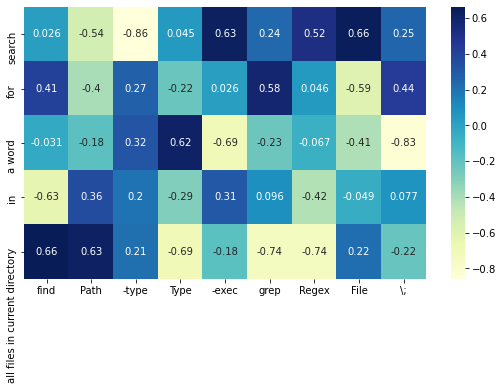

------------------------------------------------------------------------------------------------------------------------
90
['find', 'Path', '-name', 'Regex']


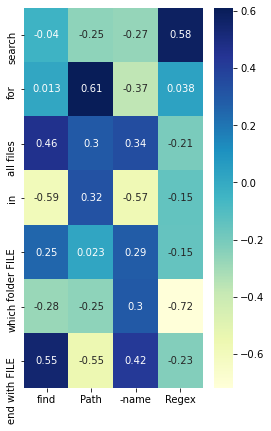

------------------------------------------------------------------------------------------------------------------------
91
['history', '|', 'awk', 'Program']


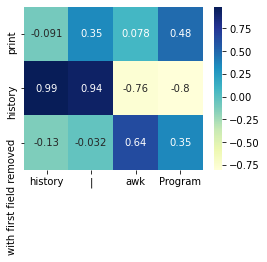

------------------------------------------------------------------------------------------------------------------------
92
['find', 'Path', '-perm', 'Permission', '-exec', 'chmod', 'Permission', 'File', '\\;']


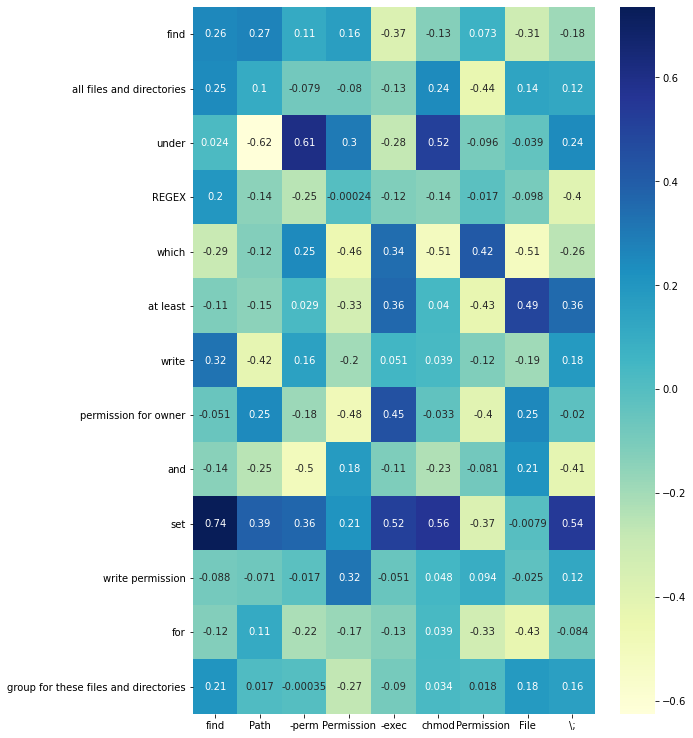

------------------------------------------------------------------------------------------------------------------------
93
['find', 'Path', '-mtime', 'Timespan']


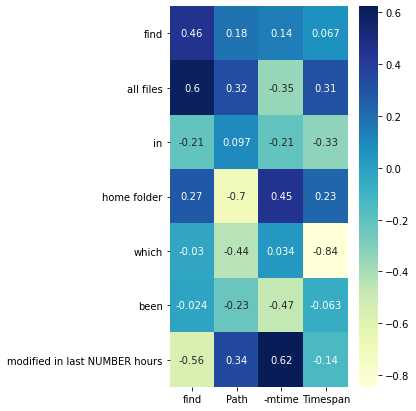

------------------------------------------------------------------------------------------------------------------------
94
['ln', '-f', 'File', 'Regex']


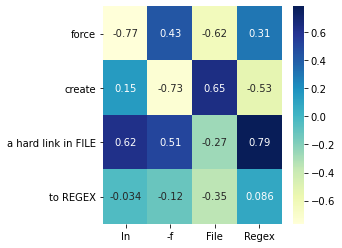

------------------------------------------------------------------------------------------------------------------------
95
['diff', '-y', 'File', 'File']


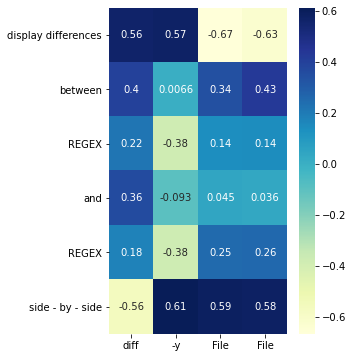

------------------------------------------------------------------------------------------------------------------------
96
['find', 'Path', '-name', 'Regex', '-exec', 'chmod', 'Permission', 'File', '\\;']


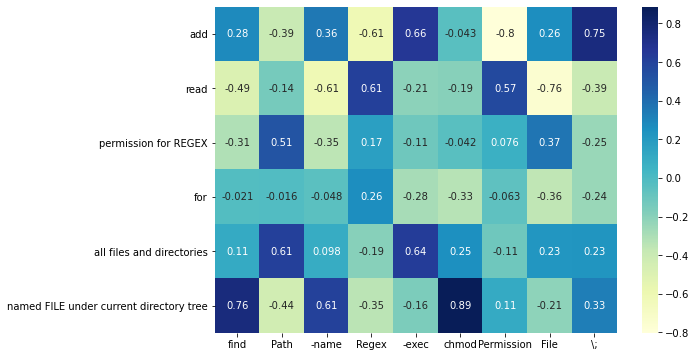

------------------------------------------------------------------------------------------------------------------------
97
['find', 'Path', '-type', 'Type', '-atime', 'Timespan']


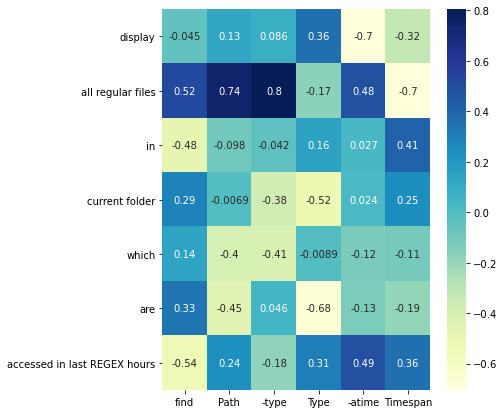

------------------------------------------------------------------------------------------------------------------------
98
['find', 'Path', '-user', 'Regex']


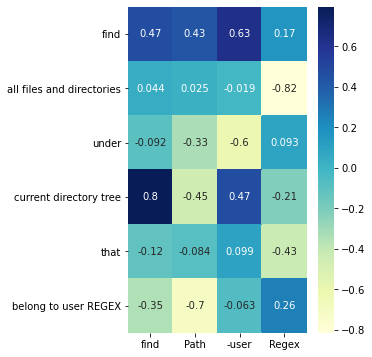

------------------------------------------------------------------------------------------------------------------------
99
['df', '-h', 'File']


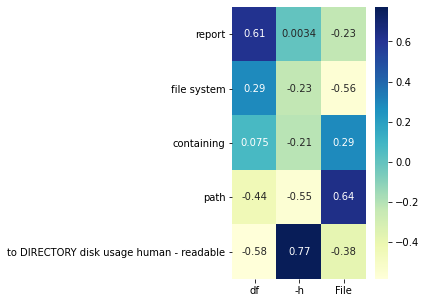

------------------------------------------------------------------------------------------------------------------------


In [58]:
import pandas as pd

c=0
for i in range(len(pred_full_data)):
    print(i)
    # image_save_path = 'attribution_images/'+str(i)+'.png'
    plot_fig(i, save_fig_name= None)
    print('------'*20)
    c+=1
    if c==100:
        break